# Project Title : Loan Default Risk Analysis

## Overview
This dataset contains 45,000 records of loan applicants, with various attributes related to personal demographics, financial status, and loan details. The dataset can be used for predictive modeling, particularly in credit risk assessment and loan default prediction.

### Objective 
The aim of this dataset is to enable predictive modelling and analysis for credit risk assessment, particularly focused on:

 ##### Loan Default Prediction
 * Predict whether a loan applicant will repay the loan or default (loan_status as the target)
 * This helps financial institutions minimize risk by identifying high-risk applicants before approving loans.
aership, and loan amounts.
s.



### Dataset Content

The dataset includes 14 columns representing different factors influencing loan approvals and defaults:

##### Personal Information

person_age: Age of the applicant (in years).

person_gender: Gender of the applicant (male, female).

person_education: Educational background (High School, Bachelor, Master, etc.).

person_income: Annual income of the applicant (in USD).

person_emp_exp: Years of employment experience.

person_home_ownership: Type of home ownership (RENT, OWN, MORTGAGE).

##### Loan Details

loan_amnt: Loan amount requested (in USD).

loan_intent: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).

loan_int_rate: Interest rate on the loan (percentage).

loan_percent_income: Ratio of loan amount to income.

##### Credit & Loan History

cb_person_cred_hist_length: Length of the applicant's credit history (in years).

credit_score: Credit score of the applicant.

previous_loan_defaults_on_file: Whether the applicant has previous loan defaults (Yes or No).


##### Target Variable

loan_status: 1 if the loan was repaid successfully, 0 if the applicant defaulted.




In [4]:
# importing all basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df=pd.read_csv("C:/Users/DELL/Documents/loan_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.761956,6.028456,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [12]:
df.shape

(45000, 14)

In [14]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [16]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [18]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Exploratory Data Analysis

##### There are a few types of feature variables in our dataset. Let's examine how they relate to the target class.

## Gender distribution of loan applicants

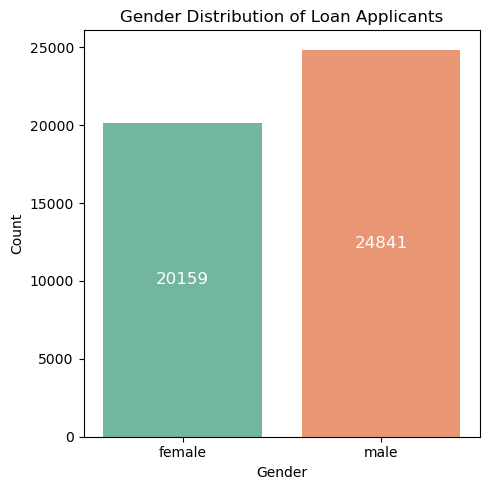

In [23]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x="person_gender", palette="Set2") 
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=12)
plt.title("Gender Distribution of Loan Applicants")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


##### The bar plot shows the gender distribution of loan applicants and it is interpreted that there are more male applicants than female applicants.

## Age distribution 

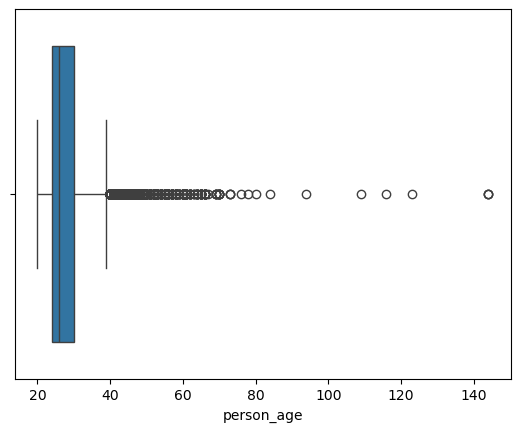

In [27]:
sns.boxplot(x="person_age",data=df)
plt.show()

##### Here majority of loan applicants are young to middle-aged adults and there are several outlier ages that might be genuine Genuine elderly applicants or data entry errors. For a clean modeling we need to remove extreme outliers. 



In [30]:
# to remove outliers that is above 100:
df=df[df["person_age"]<100]

## Impact of Credit Score on Loan Repayment Status

In [33]:
df.groupby('loan_status')['credit_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,34994.0,632.787649,50.433583,390.0,602.0,640.0,670.0,784.0
1,10000.0,631.887200,50.293485,431.0,601.0,639.0,669.0,767.0


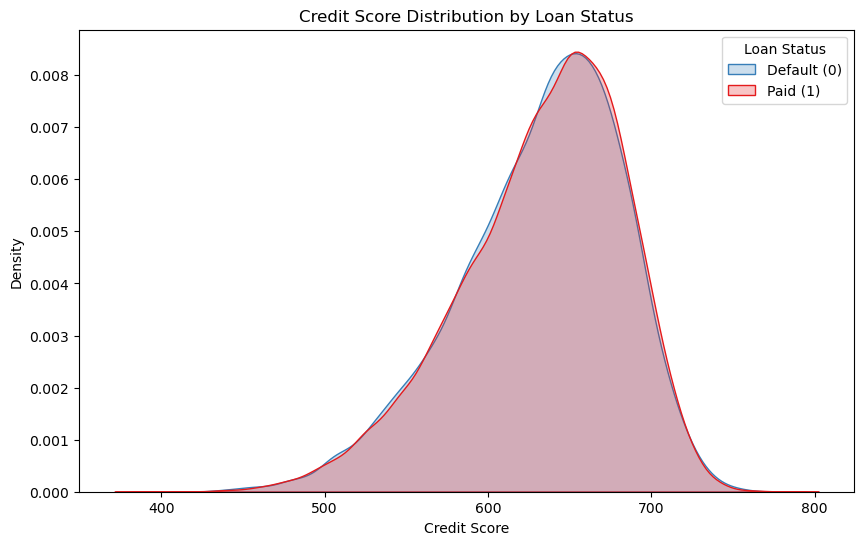

In [35]:
#To visualize how credit scores are distributed for defaulters vs non-defaulters:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='credit_score', hue='loan_status', fill=True, palette='Set1', common_norm=False)
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend(title='Loan Status', labels=['Default (0)', 'Paid (1)'])
plt.show()

##### The KDE plot shows that applicants with lower credit scores are slightly more likely to default, while those with higher credit scores tend to default, but overall distributions are very similar which is suggesting that credit score alone is not a strong stand-alone predictor of loan default.

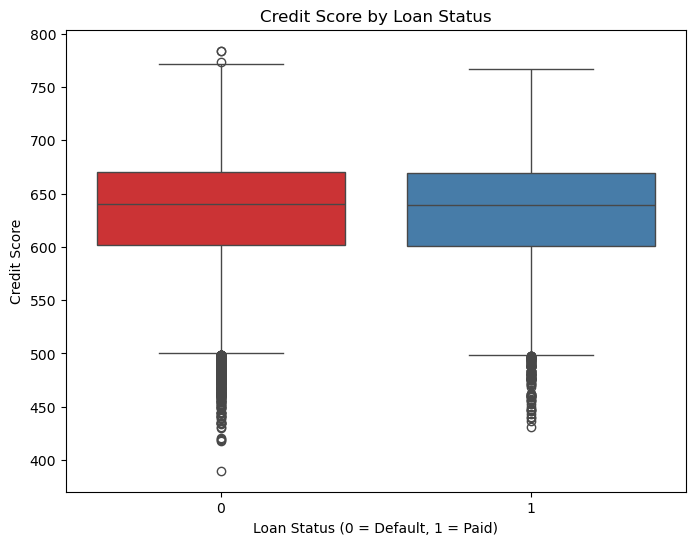

In [38]:
# To see how the distribution of credit score compares between the two groups:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='credit_score', data=df, palette='Set1')
plt.title('Credit Score by Loan Status')
plt.xlabel('Loan Status (0 = Default, 1 = Paid)')
plt.ylabel('Credit Score')
plt.show()

##### The box plot shows that the median credit scores of defaulters and non-defaulters are very close, but defaulters have a few more lower-end outliers, suggesting that very low credit scores are commonly associated with defaults, although the overall credit score ranges are similar.

### Overall interpretation of impact of Credit Score on Loan Repayment Status :
#### Credit score shows only a slight difference between defaulted and paid loans, with high default rates persisting even in higher score groups. This suggests that credit score alone is a weak predictor of loan repayment, and other factors likely play a more important role.

## Distribution of loan purposes

In [43]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9151
MEDICAL              8548
VENTURE              7816
PERSONAL             7551
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

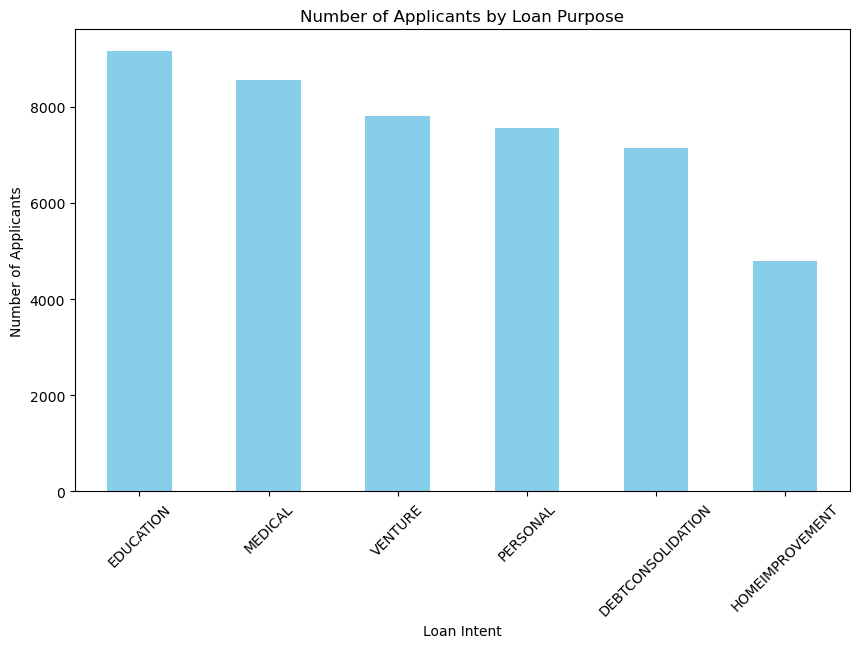

In [45]:
plt.figure(figsize=(10, 6))
df['loan_intent'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Applicants by Loan Purpose")
plt.xlabel("Loan Intent")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.show()

##### This analysis shows the distribution of loan purposes in the dataset.Education loans are the most common, followed by medical and venture loans

## Repayment rate for each loan purpose

In [49]:
repayment_rates = df.groupby('loan_intent')['loan_status'].mean() * 100
repayment_rates = repayment_rates.round(2).sort_values(ascending=False)
# Converting DataFrame in to columns. 
repayment_summary = repayment_rates.reset_index()
# Naming the columns.
repayment_summary.columns = ['Loan Purpose', 'Repayment Rate (loan_status = 1)']
# Format as percentage string
repayment_summary['Repayment Rate (loan_status = 1)'] = repayment_summary['Repayment Rate (loan_status = 1)'].astype(str) + '%'

print(repayment_summary)

        Loan Purpose Repayment Rate (loan_status = 1)
0  DEBTCONSOLIDATION                           30.27%
1            MEDICAL                           27.82%
2    HOMEIMPROVEMENT                            26.3%
3           PERSONAL                           20.14%
4          EDUCATION                           16.96%
5            VENTURE                           14.43%


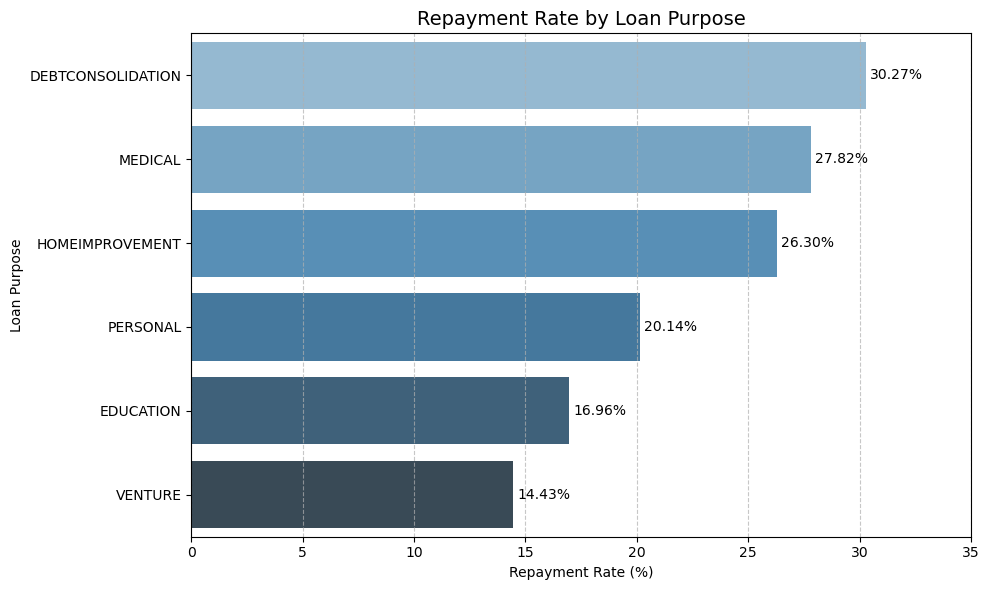

In [51]:
#for visualization keep the column as number 
repayment_summary = df.groupby('loan_intent')['loan_status'].mean().reset_index()
repayment_summary['loan_status'] = repayment_summary['loan_status'] * 100
repayment_summary = repayment_summary.sort_values(by='loan_status', ascending=False)

plt.figure(figsize=(10, 6))
ax =sns.barplot(data=repayment_summary, x='loan_status', y='loan_intent', palette='Blues_d')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)
plt.title("Repayment Rate by Loan Purpose", fontsize=14)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Loan Purpose")
plt.xlim(0, 35)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### From the above analysis, we can analyse that the DEBTCONSOLIDATION loans are more likely to be repaid and VENTURE loans have the lowest repayment rate.

## Education-based loan status in relation to income

In [55]:
# Group income into ranges by creating a column:
df['income_bin'] = pd.cut(df['person_income'], bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                          labels=['<30k', '30-60k', '60-90k', '90-120k', '120k+'])
loan_status_summary = df.groupby(['person_education','income_bin', 'loan_status']).size().reset_index(name='Count')

#To remove NaN appears while grouping by when there's no data in a specific group. To remove that:
loan_status_summary = loan_status_summary.dropna()
loan_status_summary

,person_education,income_bin,loan_status,Count
0,Associate,<30k,0,346
1,Associate,<30k,1,445
2,Associate,30-60k,0,2914
3,Associate,30-60k,1,1225
4,Associate,60-90k,0,2979
5,Associate,60-90k,1,613
6,Associate,90-120k,0,1610
7,Associate,90-120k,1,207
8,Associate,120k+,0,1527
9,Associate,120k+,1,160


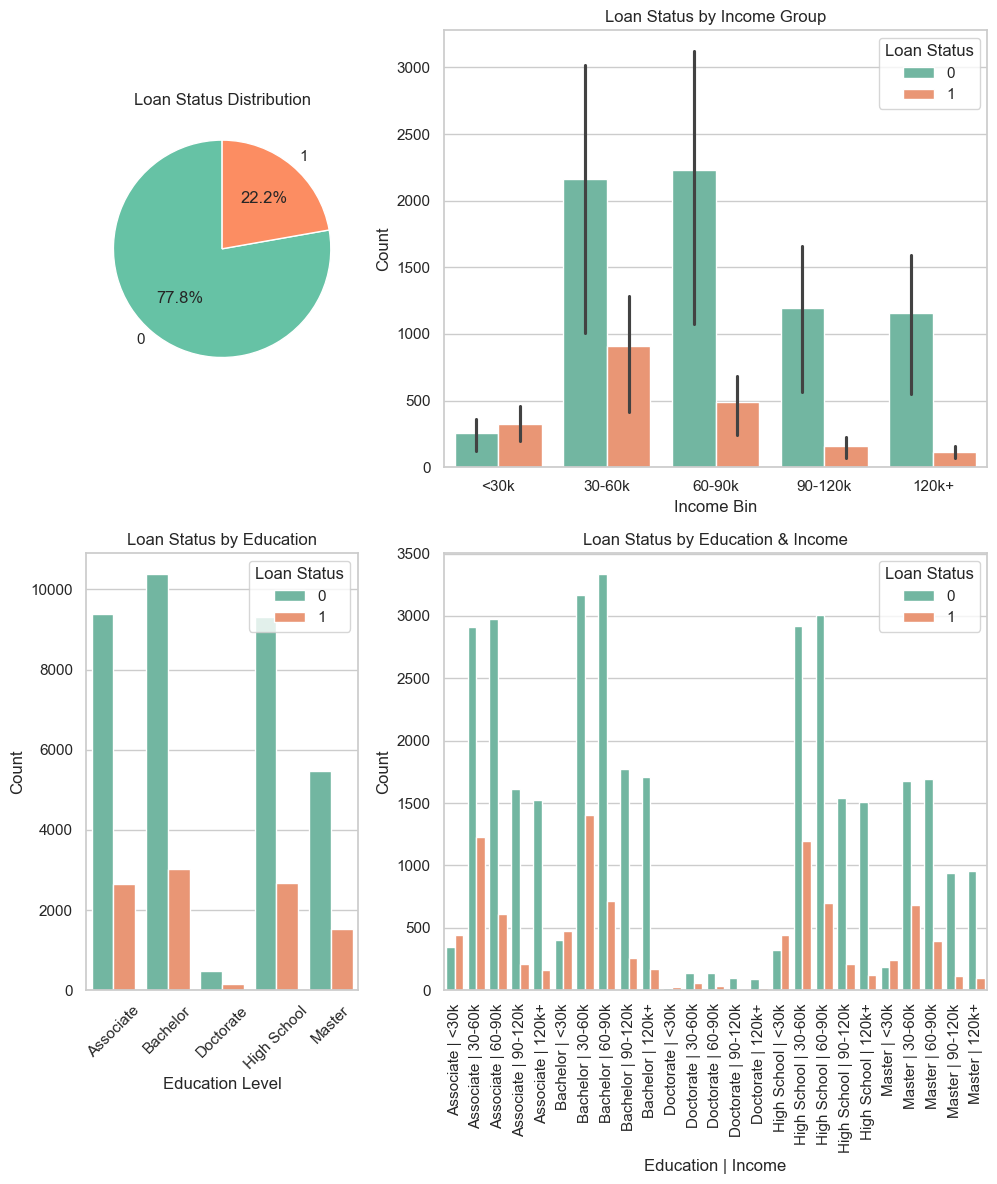

In [59]:

import matplotlib.gridspec as gridspec

# Set Seaborn style
sns.set(style="whitegrid", palette="Set2")

# Create a custom grid layout: 2 rows, 4 columns with specific width ratios
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 2, 1, 2])  # narrow, wide layout

# Overall loan status
loan_status_counts = loan_status_summary.groupby('loan_status')['Count'].sum()
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Loan Status Distribution')

# Loan status by Income Bin
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=loan_status_summary,
            x='income_bin', y='Count', hue='loan_status',
            ax=ax2)
ax2.set_title('Loan Status by Income Group')
ax2.set_xlabel('Income Bin')
ax2.set_ylabel('Count')
ax2.legend(title='Loan Status')

# Loan status by Education
education_summary = loan_status_summary.groupby(['person_education', 'loan_status'])['Count'].sum().reset_index()
ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(data=education_summary,
            x='person_education', y='Count', hue='loan_status',
            ax=ax3)
ax3.set_title('Loan Status by Education')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Count')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Loan Status')

# Loan status by Education & Income combined
edu_income_summary = loan_status_summary.groupby(['person_education', 'income_bin', 'loan_status'])['Count'].sum().reset_index()
edu_income_summary['edu_income'] = edu_income_summary['person_education'].astype(str) + ' | ' + edu_income_summary['income_bin'].astype(str)

ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(data=edu_income_summary,
            x='edu_income', y='Count', hue='loan_status',
            ax=ax4, ci=None, palette="Set2")
ax4.set_title('Loan Status by Education & Income')
ax4.set_xlabel('Education | Income')
ax4.set_ylabel('Count')
ax4.tick_params(axis='x', rotation=90)
ax4.legend(title='Loan Status')


plt.tight_layout()
plt.show()


#### Interpretations 
*  Most applicants are paying their loans responsibly, but a significant portion is defaulting. 
*  There’s a clear inverse relationship between income and default — as income increases, the likelihood of default decreases.
*  Higher education (like Master's or Doctorate) appears correlated with fewer defaults.
*  Income is a stronger factor than education alone, but the combination of higher education and higher income clearly leads to the lowest default risk.

In [62]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_bin
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1,60-90k
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0,<30k
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1,<30k
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1,60-90k
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1,60-90k


In [64]:
df.drop('income_bin', axis=1, inplace=True)

In [66]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

#### Correlation 

In [69]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

# Use Label Encoding for categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



Categorical Columns: Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


In [71]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16.02,0.49,3,561,0,1
1,21,0,3,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,0,3,12438,3,0,5500,3,12.87,0.44,3,635,0,1
3,23,0,1,79753,0,3,35000,3,15.23,0.44,2,675,0,1
4,24,1,4,66135,1,3,35000,3,14.27,0.53,4,586,0,1


In [79]:
df.corr()["loan_status"]

person_age                       -0.020536
person_gender                    -0.000545
person_education                 -0.001767
person_income                    -0.169036
person_emp_exp                   -0.019663
person_home_ownership             0.233830
loan_amnt                         0.107702
loan_intent                      -0.072126
loan_int_rate                     0.332045
loan_percent_income               0.384859
cb_person_cred_hist_length       -0.014728
credit_score                     -0.007428
previous_loan_defaults_on_file   -0.543192
loan_status                       1.000000
Name: loan_status, dtype: float64

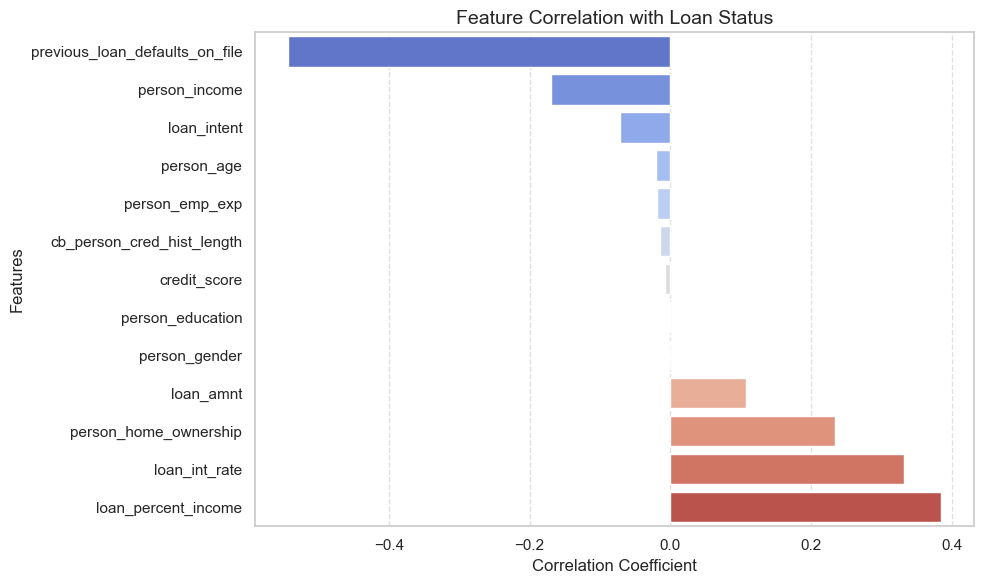

In [81]:
# Compute correlation with loan_status
corr_with_target = df.corr()['loan_status'].drop('loan_status').sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")

plt.title("Feature Correlation with Loan Status", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Interpretation :
##### The most influential feature is previous loan defaults (a major red flag), while loan-to-income ratio, interest rate, and home ownership are positive indicators of repayment capability.

In [84]:
# Train and Test 
# declaring x,y

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x_f=df[['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file']]
x=sm.add_constant(x_f)
y=df["loan_status"]

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [109]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [111]:
# Here, we are choosing RandomForestClassifier as model because of it high test accuracy score (92.29%) and lowest error while testing with other models.

mdl = RandomForestClassifier()

mdl.fit(x_train_scaled, y_train)

y_pred = mdl.predict(x_test_scaled)
y_pred1 = mdl.predict(x_train_scaled)

In [82]:

print(classification_report(y_train,y_pred1))
print("Train Accuracy:", accuracy_score(y_train, y_pred1))
print("confusion_matrix (Train):", confusion_matrix(y_train, y_pred1))
print("mean_absolute_error:",mean_absolute_error(y_train,y_pred1))
print("mean_squared_error:",mean_squared_error(y_train,y_pred1))
print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_pred1)))


print(classification_report(y_test,y_pred))     
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("confusion_matrix (Test):",confusion_matrix(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27979
           1       1.00      1.00      1.00      8016

    accuracy                           1.00     35995
   macro avg       1.00      1.00      1.00     35995
weighted avg       1.00      1.00      1.00     35995

Train Accuracy: 1.0
confusion_matrix (Train): [[27979     0]
 [    0  8016]]
mean_absolute_error: 0.0
mean_squared_error: 0.0
root mean squared error: 0.0
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7015
           1       0.88      0.76      0.82      1984

    accuracy                           0.92      8999
   macro avg       0.91      0.87      0.88      8999
weighted avg       0.92      0.92      0.92      8999

Test Accuracy: 0.9246582953661519
confusion_matrix (Test): [[6806  209]
 [ 469 1515]]
mean_absolute_error: 0.0753417046338482
mean_squared_error: 0.0753417046338482
root mean squared error: 0

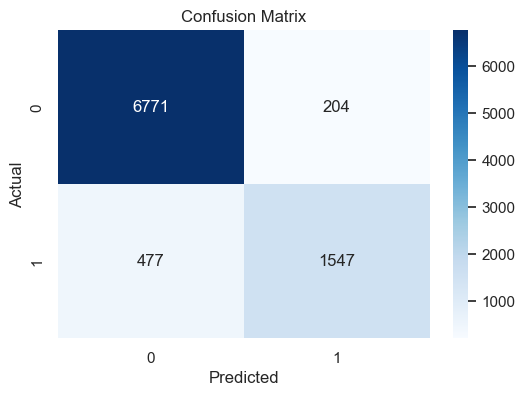

In [113]:
# visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [117]:
# Add Predictions to Test Data
# First, reset the index so we can merge properly
x_test_reset = x_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred, name='Predicted_Charges')

# Combine actual features, actual charges, and predicted charges
final_df = pd.concat([x_test_reset, y_test_reset, y_pred_series], axis=1)

# Show top 10 rows of the updated dataset
final_df.head(10)


,const,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,Predicted_Charges
0,1.0,24,0,1,39839,0,3,14000,3,14.17,0.35,2,676,0,1,1
1,1.0,27,0,3,75448,7,3,5000,2,11.01,0.07,5,705,0,0,0
2,1.0,31,1,1,25118,10,3,4760,3,10.52,0.19,8,688,0,0,0
3,1.0,22,1,3,72654,3,0,5200,4,5.99,0.07,4,659,1,0,0
4,1.0,25,1,3,87221,0,3,6000,5,11.86,0.07,3,691,0,0,0
5,1.0,24,1,1,142765,0,3,7000,2,8.49,0.05,2,643,1,0,0
6,1.0,29,0,1,55039,3,0,9227,3,10.12,0.17,5,631,1,0,0
7,1.0,41,1,0,143715,17,0,5000,4,10.49,0.03,11,662,1,0,0
8,1.0,26,0,0,121224,6,0,24000,2,10.99,0.20,4,685,1,0,0
9,1.0,28,1,0,63835,6,3,5000,2,13.48,0.08,7,669,0,0,1


## Conclusion

This project aimed to build a robust predictive model to identify potential loan defaults using a synthetic dataset of 45,000 loan applicants. Through exploratory data analysis (EDA), feature engineering, and machine learning techniques, this project developed insights into factors influencing loan repayment behavior and assessed the risk level of applicants.

 Feature Importance showed that key drivers of loan default prediction in this model included: 
* Debt-to-Income Ratio (loan_percent_income) -
  Higher ratio = more financial strain = higher risk of default
* Employment Experience (person_emp_exp) -
  Less experience = more uncertainty = increased default risk
* Loan Amount (loan_amnt) -
   Higher amounts = higher burden = greater default chance
* Loan Purpose (loan_intent)-
  Certain loan intents show higher default patterns historically
 

The model used in this project ( RandomForestClassifier) Achieved a high overall accuracy of ~93% on the test set.

This machine learning model helps in predicting the likelihood of loan default before approving the loan. This gives lenders a heads-up on who’s risky.
It provides insights to guide loan policy decisions, including:
* Adjusting interest rates based on risk.
* Tailoring offers for low-risk groups.

Supports regulatory compliance by maintaining transparency in decision-making via explainable models.

